In [1]:
workdir = '~/dv/sns-chops/resolution/CNCS/mcvine'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

import histogram.hdf as hh, histogram as H
import mcvine, mcvine.components
from mcni.utils import conversion as C

from matplotlib import pyplot as plt
%matplotlib notebook

import mcvine, mcvine.components as mcomps
from mcvine import run_script

from mantid import simpleapi as msa

/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [7]:
instrument = mcvine.instrument()

src = mcvine.components.sources.SNS_source_analytic(
    name='moderator',
    xwidth=0.1, yheight=0.12, dist=1.000,
    focus_xw=0.06, focus_yh=0.14,
    Emin=0.95, Emax=1.05,  sample_E=1, # need this, otherwise the full energy range will be used                                                                                                                                       
    p_power = 1.4,
    filename='./SNS_IRP2_TD_BL5_30o70p_fit_fit.dat',
    )
instrument.append(src, position=(0,0,0))

emon = mcvine.components.monitors.E_monitor(
    'emon', nchan=100, Emin=0.9, Emax=1.1, xwidth=0.1, yheight=0.1, filename='emon.dat')
instrument.append(emon, position=(0,0,1.))

In [8]:
%%time
# quick sim
neutrons = instrument.simulate(
    int(1e5),outputdir="out-test-SNS-analytic", overwrite_datafiles=True, iteration_no=0)

CPU times: user 708 ms, sys: 106 ms, total: 814 ms
Wall time: 816 ms


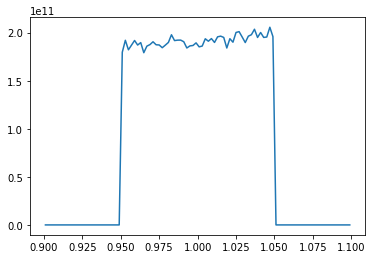

In [9]:
plt.figure()
ie = hh.load('./out-test-SNS-analytic/step0/emon.h5')
plt.plot(ie.energy, ie.I)